In [5]:
import pandas as pd
import numpy as np

In [7]:
df=pd.read_csv(r'C:\Users\Admin\anaconda3\4_AEP_Introducing_holidays.csv',  parse_dates=['Datetime'])
df.head()

,Datetime,AEP_MW,Date,Holiday
0,2004-10-01 01:00:00,12379.0,2004-10-01,0
1,2004-10-01 02:00:00,11935.0,2004-10-01,0
2,2004-10-01 03:00:00,11692.0,2004-10-01,0
3,2004-10-01 04:00:00,11597.0,2004-10-01,0
4,2004-10-01 05:00:00,11681.0,2004-10-01,0


In [9]:
df['Hour']=df['Datetime'].dt.hour
df['Month']=df['Datetime'].dt.month
df['Day_Of_Week']=df['Datetime'].dt.weekday
df["Week"] = df["Datetime"].dt.isocalendar().week
df['yearday'] = df['Datetime'].dt.dayofyear
df['quarter'] = df['Datetime'].dt.quarter
df['weekend']=(df['Day_Of_Week']>=5).astype("int")
df['day_night']=((df['Hour']>=8) & (df['Hour']<=16)).astype("int")
df.head()

,Datetime,AEP_MW,Date,Holiday,Hour,Month,Day_Of_Week,Week,yearday,quarter,weekend,day_night
0,2004-10-01 01:00:00,12379.0,2004-10-01,0,1,10,4,40,275,4,0,0
1,2004-10-01 02:00:00,11935.0,2004-10-01,0,2,10,4,40,275,4,0,0
2,2004-10-01 03:00:00,11692.0,2004-10-01,0,3,10,4,40,275,4,0,0
3,2004-10-01 04:00:00,11597.0,2004-10-01,0,4,10,4,40,275,4,0,0
4,2004-10-01 05:00:00,11681.0,2004-10-01,0,5,10,4,40,275,4,0,0


# Adding seasons
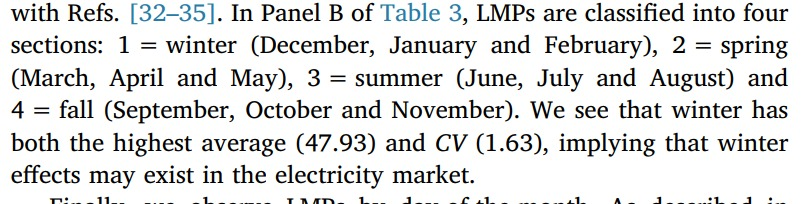

In [12]:
df['winter']= ( (df['Month'] == 12) | (df['Month'] ==1) | (df['Month'] ==2))*1
df['spring']= ( (df['Month'] == 3) | (df['Month'] ==4) | (df['Month'] ==5))*1
df['summer']= ( (df['Month'] == 6) | (df['Month'] ==7) | (df['Month'] ==8))*1
df['fall']=   ( (df['Month'] == 9) | (df['Month'] ==10) | (df['Month'] ==11))*1
df.tail()

,Datetime,AEP_MW,Date,Holiday,Hour,Month,Day_Of_Week,Week,yearday,quarter,weekend,day_night,winter,spring,summer,fall
121291,2018-08-02 20:00:00,17673.0,2018-08-02,0,20,8,3,31,214,3,0,0,0,0,1,0
121292,2018-08-02 21:00:00,17303.0,2018-08-02,0,21,8,3,31,214,3,0,0,0,0,1,0
121293,2018-08-02 22:00:00,17001.0,2018-08-02,0,22,8,3,31,214,3,0,0,0,0,1,0
121294,2018-08-02 23:00:00,15964.0,2018-08-02,0,23,8,3,31,214,3,0,0,0,0,1,0
121295,2018-08-03 00:00:00,14809.0,2018-08-03,0,0,8,4,31,215,3,0,0,0,0,1,0


In [14]:
df.rename(columns={'AEP_MW': 'aep', 'yearday': 'year_day','Week':'week_no',
                   'Holiday':'holiday','quarter':'quarter','day_night':'day_night','weekend':'weekend',
                   'Hour':'hour','Month':'month','Day_Of_Week':'day_of_week'}, inplace=True)
df.head()

,Datetime,aep,Date,holiday,hour,month,day_of_week,week_no,year_day,quarter,weekend,day_night,winter,spring,summer,fall
0,2004-10-01 01:00:00,12379.0,2004-10-01,0,1,10,4,40,275,4,0,0,0,0,0,1
1,2004-10-01 02:00:00,11935.0,2004-10-01,0,2,10,4,40,275,4,0,0,0,0,0,1
2,2004-10-01 03:00:00,11692.0,2004-10-01,0,3,10,4,40,275,4,0,0,0,0,0,1
3,2004-10-01 04:00:00,11597.0,2004-10-01,0,4,10,4,40,275,4,0,0,0,0,0,1
4,2004-10-01 05:00:00,11681.0,2004-10-01,0,5,10,4,40,275,4,0,0,0,0,0,1


In [16]:
df = df.reindex(columns=['Datetime','aep', 'year_day','holiday','weekend','winter','spring','summer','fall','hour','month','day_of_week'])
df.head()

,Datetime,aep,year_day,holiday,weekend,winter,spring,summer,fall,hour,month,day_of_week
0,2004-10-01 01:00:00,12379.0,275,0,0,0,0,0,1,1,10,4
1,2004-10-01 02:00:00,11935.0,275,0,0,0,0,0,1,2,10,4
2,2004-10-01 03:00:00,11692.0,275,0,0,0,0,0,1,3,10,4
3,2004-10-01 04:00:00,11597.0,275,0,0,0,0,0,1,4,10,4
4,2004-10-01 05:00:00,11681.0,275,0,0,0,0,0,1,5,10,4


In [24]:
df.to_csv(r'C:\Users\Admin\anaconda3\5_features_extracted.csv', index=False)

In [25]:
df.isnull().sum()

Datetime       0
aep            0
year_day       0
holiday        0
weekend        0
winter         0
spring         0
summer         0
fall           0
hour           0
month          0
day_of_week    0
dtype: int64